source: https://github.com/GoogleCloudPlatform/training-data-analyst/tree/master/courses/machine_learning/deepdive/09_sequence/labs

I have made some adjustments to the original source file.

This has been run using Google Cloud Datalab.


## Results, local runs

linear model: global step 2000: RMSE = 0.1532299, RMSE_same_as_last = 0.3117641, global_step = 2000, loss = 0.023479404

dnn model: global step 2000: RMSE = 0.11698221, RMSE_same_as_last = 0.3117641, global_step = 2000, loss = 0.013684837

cnn model: global step 2000: RMSE = 0.1166494, RMSE_same_as_last = 0.3117641, global_step = 2000, loss = 0.013607081

rnn model: global step 2000: RMSE = 0.096613005, RMSE_same_as_last = 0.3117641, global_step = 2000, loss = 0.009259149

rnn2 model (2 layer rnn): global step 2000: RMSE = 0.0942276, RMSE_same_as_last = 0.3117641, global_step = 2000, loss = 0.010029886

rnnN model (3 layer rnn): global step 2000: RMSE = 0.09779828, RMSE_same_as_last = 0.3117641, global_step = 2000, loss = 0.009500676


# Local predictions

In [34]:
import numpy as np
import tensorflow as tf
import os

print(tf.__version__)

1.8.0


In [35]:
SEQ_LEN = 50
os.environ['SEQ_LEN'] = str(SEQ_LEN)


In [36]:
def create_time_series():
  freq = (np.random.random()*0.5) + 0.1  # 0.1 to 0.6
  ampl = np.random.random() + 0.5  # 0.5 to 1.5
  noise = [np.random.random()*0.3 for i in range(SEQ_LEN)] # -0.3 to +0.3 uniformly distributed
  x = np.sin(np.arange(0,SEQ_LEN) * freq) * ampl + noise
  return x

/usr/local/envs/py3env/lib/python3.5/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


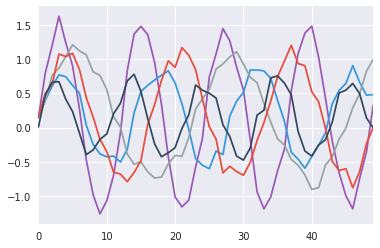

In [48]:
import seaborn as sns

flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
for i in range(0, 5):
  sns.tsplot( create_time_series(), color=flatui[i%len(flatui)] );  # 5 series

In [37]:
def to_csv(filename, N):
  with open(filename, 'w') as ofp:
    for i in range(0, N):
      seq = create_time_series()
      line = ",".join(map(str, seq))
      ofp.write(line + '\n')

In [38]:
try:
  os.makedirs('data/sines/')
  os.makedirs('trained/sines/')
except OSError:
  pass

In [39]:
to_csv('data/sines/train-1.csv', 1000)  # 1000 sequences
to_csv('data/sines/valid-1.csv', 250)   # 250 sequences

In [40]:
!head -3 data/sines/*-1.csv

==> data/sines/train-1.csv <==
0.2020410559545028,0.8244250900359102,1.3953467381164688,1.7424065426929927,1.5035680671367437,0.9676231527428045,0.18692946089567802,-0.5634272553917439,-1.0183233826057698,-1.2900893242100868,-1.032055470135151,-0.7455150303511363,0.090227982757429,0.6849743550090353,1.3248776666122029,1.6450964008923745,1.4954775711542334,1.0796906661136159,0.28386095916663656,-0.4606253349993027,-0.9351745806791364,-1.3990229846807796,-1.1484183891642878,-0.6066925731620076,-0.06306482681189708,0.8943929456987443,1.295687408149093,1.507060313633342,1.5783523288866526,1.0409624094517649,0.2620558462641865,-0.3058048317887055,-1.0589033100505776,-1.4122570377912442,-1.1538762657675483,-0.8075428434971104,0.07758796731959353,0.5547517030656434,1.1636437263013606,1.6101408219632674,1.5116085485240498,1.2137406903579155,0.35323984997694263,-0.2509089274207568,-0.9786942977558981,-1.2306321430486302,-1.3433678627577679,-0.7123934318288152,0.01182603592372361,0.4826740194647

In [41]:
!echo $(pwd)

/content/datalab/notebooks/training-data-analyst/courses/machine_learning/deepdive/09_sequence/labs


In [23]:
#!/bin/sh
#DATADIR="$(pwd)/data/sines"
#OUTDIR="$(pwd)/trained/sines"

In [24]:
#!echo $DATADIR
#!echo $OUTDIR

/content/datalab/notebooks/training-data-analyst/courses/machine_learning/deepdive/09_sequence/labs/data/sines
/content/datalab/notebooks/training-data-analyst/courses/machine_learning/deepdive/09_sequence/labs/trained/sines


In [49]:
%bash
DATADIR=$(pwd)/data/sines
OUTDIR=$(pwd)/trained/sines
rm -rf $OUTDIR
gcloud ml-engine local train \
   --module-name=sinemodel.task \
   --package-path=${PWD}/sinemodel \
   -- \
   --train_data_path="${DATADIR}/train-1.csv" \
   --eval_data_path="${DATADIR}/valid-1.csv"  \
   --output_dir=${OUTDIR} \
   --model=rnnN --train_steps=2000 --sequence_length=$SEQ_LEN

rnn2_model: x: Tensor("Reshape:0", shape=(?, 49, 1), dtype=float32)
rnn2_model: state: (<tf.Tensor 'rnn/while/Exit_3:0' shape=(?, 48) dtype=float32>, <tf.Tensor 'rnn/while/Exit_4:0' shape=(?, 24) dtype=float32>, <tf.Tensor 'rnn/while/Exit_5:0' shape=(?, 12) dtype=float32>)
rnn2_model: h1: Tensor("dense/Relu:0", shape=(?, 49, 12), dtype=float32)
rnn2_model: h2: Tensor("dense_1/Relu:0", shape=(?, 49, 6), dtype=float32)
rnn2_model: predictions: Tensor("dense_2/BiasAdd:0", shape=(?, 49, 1), dtype=float32)
rnn2_model: x: Tensor("Reshape:0", shape=(?, 49, 1), dtype=float32)
rnn2_model: state: (<tf.Tensor 'rnn/while/Exit_3:0' shape=(?, 48) dtype=float32>, <tf.Tensor 'rnn/while/Exit_4:0' shape=(?, 24) dtype=float32>, <tf.Tensor 'rnn/while/Exit_5:0' shape=(?, 12) dtype=float32>)
rnn2_model: h1: Tensor("dense/Relu:0", shape=(?, 49, 12), dtype=float32)
rnn2_model: h2: Tensor("dense_1/Relu:0", shape=(?, 49, 6), dtype=float32)
rnn2_model: predictions: Tensor("dense_2/BiasAdd:0", shape=(?, 49, 1), d

/usr/local/envs/py3env/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
INFO:tensorflow:TF_CONFIG environment variable: {'task': {}, 'cluster': {}, 'environment': 'cloud', 'job': {'args': ['--train_data_path=/content/datalab/notebooks/training-data-analyst/courses/machine_learning/deepdive/09_sequence/labs/data/sines/train-1.csv', '--eval_data_path=/content/datalab/notebooks/training-data-analyst/courses/machine_learning/deepdive/09_sequence/labs/data/sines/valid-1.csv', '--output_dir=/content/datalab/notebooks/training-data-analyst/courses/machine_learning/deepdive/09_sequence/labs/trained/sines', '--model=rnnN', '--train_steps=2000', '--sequence_length=50'], 'job_name': 'sinemodel.task'}}
INFO:tensorflow:Using config: {'_session_config': None, 

In [52]:
from google.datalab.ml import TensorBoard
TensorBoard().start('/content/datalab/notebooks/training-data-analyst/courses/machine_learning/deepdive/09_sequence/labs/trained/sines')

TensorBoard was started successfully with pid 8079. Click here to access it.

8079

## Results, local runs

linear model: global step 2000: RMSE = 0.1532299, RMSE_same_as_last = 0.3117641, global_step = 2000, loss = 0.023479404

dnn model: global step 2000: RMSE = 0.11698221, RMSE_same_as_last = 0.3117641, global_step = 2000, loss = 0.013684837

cnn model: global step 2000: RMSE = 0.1166494, RMSE_same_as_last = 0.3117641, global_step = 2000, loss = 0.013607081

rnn model: global step 2000: RMSE = 0.096613005, RMSE_same_as_last = 0.3117641, global_step = 2000, loss = 0.009259149

rnn2 model (2 layer rnn): global step 2000: RMSE = 0.0942276, RMSE_same_as_last = 0.3117641, global_step = 2000, loss = 0.010029886

rnnN model (3 layer rnn): global step 2000: RMSE = 0.09779828, RMSE_same_as_last = 0.3117641, global_step = 2000, loss = 0.009500676




<h1> Time series prediction, end-to-end </h1>

This notebook illustrates several models to find the next value of a time-series:
<ol>
<li> Linear
<li> DNN
<li> CNN 
<li> RNN
</ol>

In [50]:
# change these to try this notebook out
BUCKET = 'cloud-training-demos-ml'
PROJECT = 'cloud-training-demos'
REGION = 'us-central1'
SEQ_LEN = 50

In [51]:
import os
os.environ['BUCKET'] = BUCKET
os.environ['PROJECT'] = PROJECT
os.environ['REGION'] = REGION
os.environ['SEQ_LEN'] = str(SEQ_LEN)
os.environ['TFVERSION'] = '1.8'

<h3> Simulate some time-series data </h3>

Essentially a set of sinusoids with random amplitudes and frequencies.

In [ ]:
import tensorflow as tf
print(tf.__version__)

In [ ]:
import numpy as np
import seaborn as sns

def create_time_series():
  freq = (np.random.random()*0.5) + 0.1  # 0.1 to 0.6
  ampl = np.random.random() + 0.5  # 0.5 to 1.5
  noise = [np.random.random()*0.3 for i in range(SEQ_LEN)] # -0.3 to +0.3 uniformly distributed
  x = np.sin(np.arange(0,SEQ_LEN) * freq) * ampl + noise
  return x

flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
for i in range(0, 5):
  sns.tsplot( create_time_series(), color=flatui[i%len(flatui)] );  # 5 series

In [ ]:
def to_csv(filename, N):
  with open(filename, 'w') as ofp:
    for lineno in range(0, N):
      seq = create_time_series()
      line = ",".join(map(str, seq))
      ofp.write(line + '\n')

import os
try:
  os.makedirs('data/sines/')
except OSError:
  pass
to_csv('data/sines/train-1.csv', 1000)  # 1000 sequences
to_csv('data/sines/valid-1.csv', 250)

In [ ]:
!head -5 data/sines/*-1.csv

<h3> Train model locally </h3>

Make sure the code works as intended.

The `model.py` and `task.py` containing the model code is in <a href="sinemodel">sinemodel/</a>

**Complete the TODOs in `model.py` before proceeding!**

Once you've completed the TODOs, set `--model` below to the appropriate model (linear,dnn,cnn,rnn,rnn2 or rnnN) and run it locally for a few steps to test the code.

In [ ]:
%bash
DATADIR=$(pwd)/data/sines
OUTDIR=$(pwd)/trained/sines
rm -rf $OUTDIR
gcloud ml-engine local train \
   --module-name=sinemodel.task \
   --package-path=${PWD}/sinemodel \
   -- \
   --train_data_path="${DATADIR}/train-1.csv" \
   --eval_data_path="${DATADIR}/valid-1.csv"  \
   --output_dir=${OUTDIR} \
   --model=linear --train_steps=10 --sequence_length=$SEQ_LEN

<h3> Cloud ML Engine </h3>

Now to train on Cloud ML Engine with more data.

In [ ]:
import shutil
shutil.rmtree('data/sines', ignore_errors=True)
os.makedirs('data/sines/')
for i in range(0,10):
  to_csv('data/sines/train-{}.csv'.format(i), 1000)  # 1000 sequences
  to_csv('data/sines/valid-{}.csv'.format(i), 250)

In [ ]:
%bash
gsutil -m rm -rf gs://${BUCKET}/sines/*
gsutil -m cp data/sines/*.csv gs://${BUCKET}/sines

In [ ]:
%%bash
for MODEL in linear dnn cnn rnn rnn2 rnnN; do
  OUTDIR=gs://${BUCKET}/sinewaves/${MODEL}
  JOBNAME=sines_${MODEL}_$(date -u +%y%m%d_%H%M%S)
  REGION=us-central1
  gsutil -m rm -rf $OUTDIR
  gcloud ml-engine jobs submit training $JOBNAME \
     --region=$REGION \
     --module-name=sinemodel.task \
     --package-path=${PWD}/sinemodel \
     --job-dir=$OUTDIR \
     --staging-bucket=gs://$BUCKET \
     --scale-tier=BASIC_GPU \
     --runtime-version=$TFVERSION \
     -- \
     --train_data_path="gs://${BUCKET}/sines/train*.csv" \
     --eval_data_path="gs://${BUCKET}/sines/valid*.csv"  \
     --output_dir=$OUTDIR \
     --train_steps=3000 --sequence_length=$SEQ_LEN --model=$MODEL
done

## Monitor training with TensorBoard

Use this cell to launch tensorboard. If tensorboard appears blank try refreshing after 5 minutes

In [ ]:
from google.datalab.ml import TensorBoard
TensorBoard().start('gs://{}/sinewaves'.format(BUCKET))

In [ ]:
for pid in TensorBoard.list()['pid']:
  TensorBoard().stop(pid)
  print 'Stopped TensorBoard with pid {}'.format(pid)

## Results

Complete the below table with your own results! Then compare your results to the results in the solution notebook.

| Model | Sequence length | # of steps | Minutes | RMSE |
| --- | ----| --- | --- | --- | 
| linear | 50 | 3000 | - | - |
| dnn | 50 | 3000 | - | - |
| cnn | 50 | 3000 | - | - |
| rnn | 50 | 3000 | - | - |
| rnn2 | 50 | 3000 | - | - |
| rnnN | 50 | 3000 | - | - |

Copyright 2017 Google Inc. Licensed under the Apache License, Version 2.0 (the "License"); you may not use this file except in compliance with the License. You may obtain a copy of the License at http://www.apache.org/licenses/LICENSE-2.0 Unless required by applicable law or agreed to in writing, software distributed under the License is distributed on an "AS IS" BASIS, WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied. See the License for the specific language governing permissions and limitations under the License